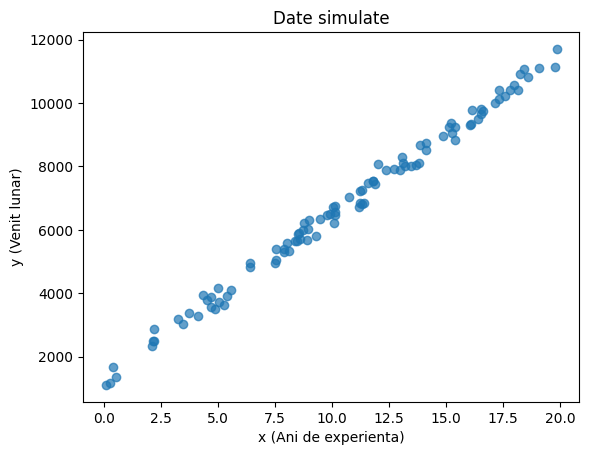

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

N = 100
alpha_real = 1500  
beta_real = 500      
eps_real = np.random.normal(0, 200, N)       

x = np.random.uniform(0, 20, N)  
y_real = alpha_real + beta_real * x 
y = y_real + eps_real

plt.scatter(x, y, alpha=0.7)
plt.xlabel("x (Ani de experienta)")
plt.ylabel("y (Venit lunar)")
plt.title("Date simulate")
plt.show()


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 23 seconds.


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

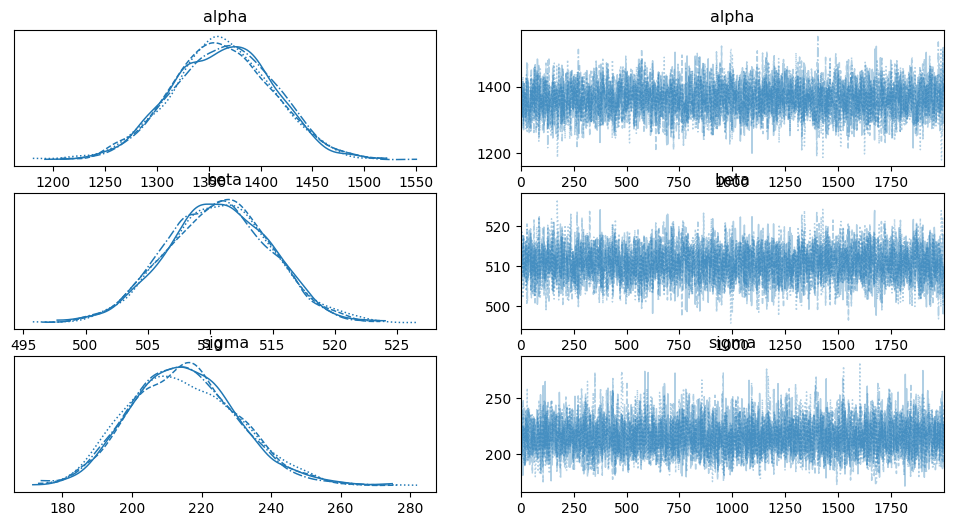

In [2]:
import pymc as pm

with pm.Model() as model_g:
    alpha = pm.Normal("alpha", mu=0, sigma=12000)  
    beta = pm.Normal("beta", mu=0, sigma=1000)         
    sigma = pm.HalfNormal("sigma", sigma=500)           

    mu = alpha + beta * x

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

az.plot_trace(idata_g, var_names=['alpha', 'beta', 'sigma'])
